In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

array([[ 0.5,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ]])

In [6]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    N = tx.shape[0]
    w = np.linalg.pinv(tx.T @ tx) @ tx.T @ y
    e = y - tx @ w
    mse = 1. / 2 / N * e.T @ e
    
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [46]:
from helpers import *
gd_m = __import__('gradient descent')
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    losses, ws = gd_m.gradient_descent(y, tx, [0, 0], 100, 0.3, False)
    i_gd = np.argmin(losses)
    w_gd = ws[i_gd]
    loss_gd = losses[i_gd]
    loss_eq, w_eq = least_squares(y, tx)
    print(w_gd, w_eq)
    assert(np.allclose(loss_eq, loss_gd))
    assert(np.allclose(w_gd, w_eq))
    print('TEST PASSED')

Test it here

In [47]:
test_your_least_squares()

[ 73.293922    13.47971243] [ 73.293922    13.47971243]
TEST PASSED


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [48]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [69]:
build_poly(x, 2)

array([[  1.00000000e+00,   3.52374910e-01,   1.24168077e-01],
       [  1.00000000e+00,   4.89512330e+00,   2.39622321e+01],
       [  1.00000000e+00,   1.86662437e+00,   3.48428655e+00],
       [  1.00000000e+00,   3.50706129e+00,   1.22994789e+01],
       [  1.00000000e+00,   3.38087384e+00,   1.14303079e+01],
       [  1.00000000e+00,   7.30937276e-01,   5.34269301e-01],
       [  1.00000000e+00,   3.88562366e+00,   1.50980712e+01],
       [  1.00000000e+00,   5.65224803e+00,   3.19479078e+01],
       [  1.00000000e+00,   6.28318531e+00,   3.94784176e+01],
       [  1.00000000e+00,   2.37137419e+00,   5.62341557e+00],
       [  1.00000000e+00,   6.04749821e-01,   3.65722346e-01],
       [  1.00000000e+00,   3.63324875e+00,   1.32004965e+01],
       [  1.00000000e+00,   8.57124731e-01,   7.34662804e-01],
       [  1.00000000e+00,   2.49756165e+00,   6.23781420e+00],
       [  1.00000000e+00,   1.61424946e+00,   2.60580133e+00],
       [  1.00000000e+00,   5.39987312e+00,   2.9158629

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [74]:
from costs import compute_loss
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        tx = build_poly(x, degree)
        l, weights = least_squares(y, tx)
        rmse = (2 * l) ** 0.5

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737495
Processing 3th experiment, degree=7, rmse=0.24965870360907982
Processing 4th experiment, degree=12, rmse=0.470921042936788


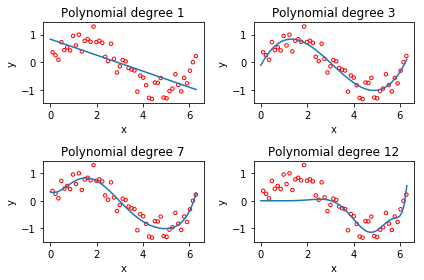

In [75]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [81]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    L = x.shape[0]
    rg = range(L)
    idx_tr = np.random.choice(rg, size = int(L * ratio))
    idx_te = np.setdiff1d(rg, idx_tr)
    return idx_tr, idx_te

Then, test your `split_data` function below.

In [86]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # split the data, and return train and test data
    # ***************************************************
    idx_tr, idx_te = split_data(x, y, ratio, seed)
    x_tr = x[idx_tr]
    y_tr = y[idx_tr]
    x_te = x[idx_te]
    y_te = y[idx_te]
    
    # ***************************************************
    # form train and test data with polynomial basis function
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ***************************************************
    # calcualte weight through least square.
    # ***************************************************
    _, weights = least_squares(y_tr, tx_tr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    mse_tr = compute_loss(y_tr, tx_tr, weights)
    mse_te = compute_loss(y_te, tx_te, weights)
    [rmse_tr, rmse_te] = [(2 * q) ** 0.5 for q in [mse_tr, mse_te]]
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [87]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.495, Testing RMSE=0.479
proportion=0.9, degree=3, Training RMSE=0.282, Testing RMSE=0.296
proportion=0.9, degree=7, Training RMSE=0.273, Testing RMSE=0.246
proportion=0.9, degree=12, Training RMSE=0.520, Testing RMSE=0.523
proportion=0.5, degree=1, Training RMSE=0.451, Testing RMSE=0.501
proportion=0.5, degree=3, Training RMSE=0.256, Testing RMSE=0.307
proportion=0.5, degree=7, Training RMSE=0.249, Testing RMSE=0.279
proportion=0.5, degree=12, Training RMSE=0.354, Testing RMSE=0.554
proportion=0.1, degree=1, Training RMSE=0.157, Testing RMSE=0.502
proportion=0.1, degree=3, Training RMSE=0.086, Testing RMSE=0.752
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=174.586
proportion=0.1, degree=12, Training RMSE=0.195, Testing RMSE=7950.296


# 3 Ridge Regression
Please fill in the function below.

In [108]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = tx.shape[0]
    w = np.linalg.pinv(tx.T @ tx + lambda_ * (2. * N) * np.eye(tx.shape[1])) @ tx.T @ y
    e = y - tx @ w
    mse = 1. / 2 / N * e.T @ e
    
    return mse, w

In [109]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # split the data, and return train and test data
    # ***************************************************
    
    idx_tr, idx_te = split_data(x, y, ratio, seed)
    x_tr = x[idx_tr]
    y_tr = y[idx_tr]
    x_te = x[idx_te]
    y_te = y[idx_te]
    
    # ***************************************************
    # form train and test data with polynomial basis function
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # ridge regression with a given lambda
        # ***************************************************
        
        _, weights = ridge_regression(y_tr, tx_tr, lambda_)
        mse_tr = compute_loss(y_tr, tx_tr, weights)
        mse_te = compute_loss(y_te, tx_te, weights)
        [rmse_tr_, rmse_te_] = [(2 * q) ** 0.5 for q in [mse_tr, mse_te]]
        rmse_tr.append(rmse_tr_)
        rmse_te.append(rmse_te_)
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.295
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.290
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.288
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.224, Testing RMSE=0.287
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.224, Testing RMSE=0.285
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.224, Testing RMSE=0.284
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.225, Testing RMSE=0.284
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.225, Testing RMSE=0.285
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.226, Testing RMSE=0.289
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.228, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.236, Testing RMSE=0.311
proportion=0.5, degree=7, lambda=0.193, 

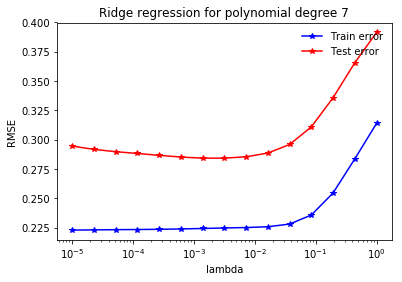

In [111]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)